<a href="https://colab.research.google.com/github/rtg7bs/ml-project-group/blob/main/results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [ ]:
df = pd.read_csv('/home/train.csv')
df


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [ ]:
# encode the target variable
target_var_df = pd.DataFrame(df["NObeyesdad"])
print(target_var_df["NObeyesdad"].unique()) # gives us 7 unique categories
# create dict to map each label to unique num
label_mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II' : 5,
    'Obesity_Type_III': 6
}
# replace original column with the mapped vals
df['NObeyesdad'] = target_var_df['NObeyesdad'].map(label_mapping)

# encode other categorical vars - binary
df['Gender'] = df['Gender'].map({"Male": 0, "Female": 1})
df["family_history_with_overweight"] = df["family_history_with_overweight"].map({"no": 0, "yes": 1})
df["FAVC"] = df["FAVC"].map({"no": 0, "yes": 1})
df["SMOKE"] = df["SMOKE"].map({"no": 0, "yes": 1})
df["SCC"] = df["SCC"].map({"no": 0, "yes": 1})

# encode categorical vars - non-binary
df["CAEC"] = df["CAEC"].map({'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3})
df["CALC"] = df["CALC"].map({'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3})

# one-hot
transportation_one_hot = pd.get_dummies(df["MTRANS"], prefix="mode")
# concat to og df
df = pd.concat([df, transportation_one_hot], axis=1)
# drop og col
df = df.drop(columns=["MTRANS"])

['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']


In [ ]:
df_test = pd.read_csv("/home/test.csv")
df_test
# # encode the target variable
# target_var_df_test = pd.DataFrame(df_test["NObeyesdad"])

# # replace original column with the mapped vals
# df_test['NObeyesdad'] = target_var_df_test['NObeyesdad'].map(label_mapping)

# # encode other categorical vars - binary
# df_test['Gender'] = df_test['Gender'].map({"Male": 0, "Female": 1})
# df_test["family_history_with_overweight"] = df_test["family_history_with_overweight"].map({"no": 0, "yes": 1})
# df_test["FAVC"] = df_test["FAVC"].map({"no": 0, "yes": 1})
# df_test["SMOKE"] = df_test["SMOKE"].map({"no": 0, "yes": 1})
# df_test["SCC"] = df_test["SCC"].map({"no": 0, "yes": 1})

# # encode categorical vars - non-binary
# df_test["CAEC"] = df_test["CAEC"].map({'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3})
# df_test["CALC"] = df_test["CALC"].map({'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3})

# # one-hot
# transportation_one_hot = pd.get_dummies(df_test["MTRANS"], prefix="mode")
# # concat to og df
# df_test = pd.concat([df_test, transportation_one_hot], axis=1)
# # drop og col
# df_test = df_test.drop(columns=["MTRANS"])

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
13836,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
13837,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation
13838,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation


In [ ]:
nan_rows = df[df.isna().any(axis=1)]
print(nan_rows)


Empty DataFrame
Columns: [id, Gender, Age, Height, Weight, family_history_with_overweight, FAVC, FCVC, NCP, CAEC, SMOKE, CH2O, SCC, FAF, TUE, CALC, NObeyesdad, mode_Automobile, mode_Bike, mode_Motorbike, mode_Public_Transportation, mode_Walking]
Index: []

[0 rows x 22 columns]


In [ ]:
# linear regression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
y = df['NObeyesdad']
X = df.loc[:, ["family_history_with_overweight", "FAVC", "Weight"]]

X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes

Z_train = pd.concat([X_train['family_history_with_overweight'],
                    X_train["FAVC"],
                    X_train["Weight"]],
                    axis = 1)
Z_test = pd.concat([X_test['family_history_with_overweight'],
                    X_test["FAVC"],
                    X_test["Weight"]],
                    axis = 1)
reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train) # Run regression
y_hat = reg.predict(Z_test)
print("Yhat: ", y_hat)
print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

Yhat:  [2.62182764 1.67719305 4.55662264 ... 4.79095575 4.57636275 2.63840663]
Rsq:  0.7274994688393622
RMSE:  1.082485089132236


,variable,coefficient
0,family_history_with_overweight,0.133799
1,FAVC,-1.566148
2,Weight,0.054056


In [ ]:
# linear regression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
y = df['NObeyesdad']
X = df.loc[:, ["family_history_with_overweight", "FAVC", "Weight", "FCVC", "NCP", "SMOKE", "FAF", "TUE", "CALC", "Gender", "Age", "Height"]]

X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes

Z_train = pd.concat([X_train['family_history_with_overweight'],
                    X_train["FAVC"],
                    X_train["Weight"],
                    X_train["FCVC"],
                    X_train["NCP"],
                    X_train["SMOKE"],
                    X_train["FAF"],
                    X_train["TUE"],
                    X_train["CALC"],
                    X_train["Gender"],
                    X_train["Age"],
                    X_train["Height"]],
                    axis = 1)
Z_test = pd.concat([X_test['family_history_with_overweight'],
                    X_test["FAVC"],
                    X_test["Weight"],
                    X_test["FCVC"],
                    X_test["NCP"],
                    X_test["SMOKE"],
                    X_test["FAF"],
                    X_test["TUE"],
                    X_test["CALC"],
                    X_test["Gender"],
                    X_test["Age"],
                    X_test["Height"]],
                    axis = 1)
reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train) # Run regression
y_hat = reg.predict(Z_test)
print("Yhat: ", y_hat)
print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

#normalization -- get vals between 0 and 1, but are not true probabilities
# y_hat_min = min(y_hat)
# print("yhat min: ", y_hat_min)
# y_hat_max = max(y_hat)
# print("yhat max: ", y_hat_max) # outside of encoded target variable range of 0 - 6
# y_hat_normalized = (y_hat - y_hat_min) / (y_hat_max - y_hat_min)

# print("yhat norm: ", y_hat_normalized)
# print("yhat norm min: ", min(y_hat_normalized))
# print("yhat norm max: ", max(y_hat_normalized))


Yhat:  [2.00210062 0.68440654 5.62298188 ... 4.90797138 5.65161863 2.46891933]
Rsq:  0.9183799544440656
RMSE:  0.5924294817086592


,variable,coefficient
0,family_history_with_overweight,0.284941
1,FAVC,0.073894
2,Weight,0.072881
3,FCVC,0.036610
4,NCP,-0.053135
5,SMOKE,-0.242648
6,FAF,-0.179639
7,TUE,0.010644
8,CALC,-0.071303
9,Gender,0.442870


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['coefficient'].plot(kind='hist', bins=20, title='coefficient')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='index', y='coefficient', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['coefficient']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('coefficient')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['coefficient'].plot(kind='line', figsize=(8, 4), title='coefficient')
plt.gca().spines[['top', 'right']].set_visible(False)

- R^2 interpretation: model explains about 92% of the variance in the target variable (values closer to 1 indicate better fit).
- RMSE: average error between predicted and actual values is 0.59 (lower RMSEs are generally better, but need to look at the scale of target variable)
- Coefficients (positive coefficients: as predictor val increases, so does the predicted val of target variable. negative coefficients: as preictor val increases, the predicted val of target variable decreases.)
  - family_history_with_overweight: if person has family history, target variable increases
  - Gender: has positive effect on target (if female, predicted to have 0.44 higher target variable value)
  - SMOKE: has negative effect on target (target variable is .24 less for each person who smokes compared to person who does not smoke -> smoking might imply lower level of obesity?)
  - Height: as height increases, predicted value of target decreases (taller individuals are predicted to have lower value of target variable)
- limitation of model: coefficients represent a change in the value of the target variable, but it doesn't necessarily give us specifics about which particular category the target variable would be in since the target variable is not on a continuous scale like weight is. All we know is that based on some coefficient value, the target variable is x units higher or lower which can give us a general idea about the relationship between the predictor and the target variable.


In [29]:
# take out predictors w/ coefficients close to 0 -- indicate not really contributing to the model
# linear regression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
y = df['NObeyesdad']
X = df.loc[:, ["family_history_with_overweight", "FAVC", "Weight", "FCVC", "NCP", "SMOKE", "FAF", "TUE", "CALC", "Gender", "Age", "Height"]]

X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes

Z_train = pd.concat([X_train['family_history_with_overweight'],
                    X_train["FAVC"],
                    X_train["Weight"],
                    X_train["SMOKE"],
                    X_train["FAF"],
                    X_train["Gender"],
                    X_train["Height"]],
                    axis = 1)
Z_test = pd.concat([X_test['family_history_with_overweight'],
                    X_test["FAVC"],
                    X_test["Weight"],
                    X_test["SMOKE"],
                    X_test["FAF"],
                    X_test["Gender"],
                    X_test["Height"]],
                    axis = 1)
reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train) # Run regression
y_hat = reg.predict(Z_test)
print("Yhat: ", y_hat)
print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

# normalization -- get vals between 0 and 1, but are not true probabilities
y_hat_min = min(y_hat)
print("yhat min: ", y_hat_min)
y_hat_max = max(y_hat)
print("yhat max: ", y_hat_max) # outside of encoded target variable range of 0 - 6
y_hat_normalized = (y_hat - y_hat_min) / (y_hat_max - y_hat_min)

print("yhat norm: ", y_hat_normalized)
print("yhat norm min: ", min(y_hat_normalized))
print("yhat norm max: ", max(y_hat_normalized))


Yhat:  [2.03542573 0.91377432 5.62582483 ... 4.78775316 5.65306349 2.20379896]
Rsq:  0.9118180386355127
RMSE:  0.6157836072340436
yhat min:  -1.1659349023327228
yhat max:  9.260197542551591
yhat norm:  [0.3070516  0.19947082 0.65141698 ... 0.57103515 0.65402952 0.32320075]
yhat norm min:  0.0
yhat norm max:  1.0


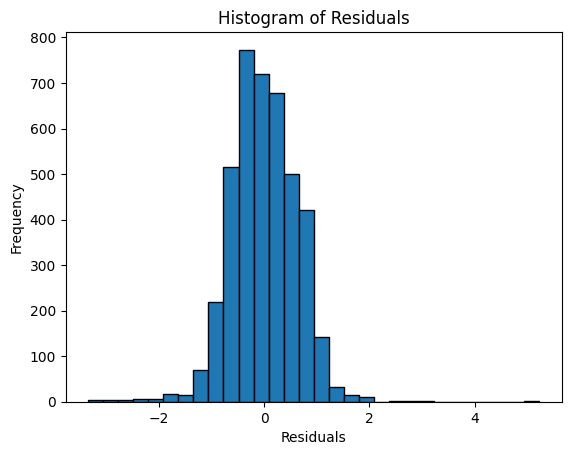

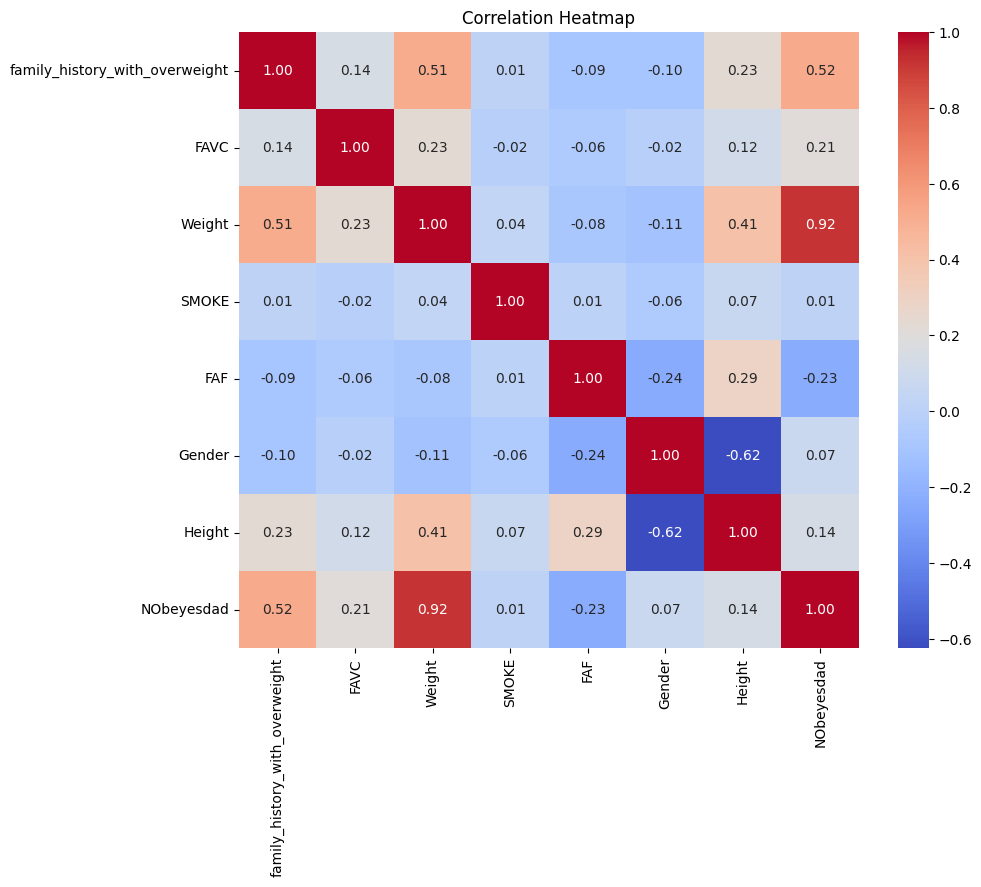

In [28]:
import matplotlib.pyplot as plt
residuals = y_test - y_hat


plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

import seaborn as sns
correlation_matrix = Z_train.join(y_train).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# using the same Z_train and Z_test from the latest iteration of the linear regression predictors
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(Z_train, y_train)  # train model
y_pred = log_reg.predict(Z_test)  # class predictions
y_pred_proba = log_reg.predict_proba(Z_test)  # probs for each class
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8241811175337187
Confusion Matrix:
 [[495  35   0   0   0   0   0]
 [ 69 460  66  12   1   0   0]
 [  5  71 289  83  20   1   3]
 [  0  11  75 304 111   4   6]
 [  0   1  17  40 440  52  11]
 [  0   0   1   3  27 641   0]
 [  1   0   0   0   3   1 793]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       530
           1       0.80      0.76      0.78       608
           2       0.65      0.61      0.63       472
           3       0.69      0.59      0.64       511
           4       0.73      0.78      0.76       561
           5       0.92      0.95      0.94       672
           6       0.98      0.99      0.98       798

    accuracy                           0.82      4152
   macro avg       0.80      0.80      0.80      4152
weighted avg       0.82      0.82      0.82      4152



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- accuracy: 82.4% of samples were correctly classified
- confusion matrix: class 6 had the most samples predicted correctly

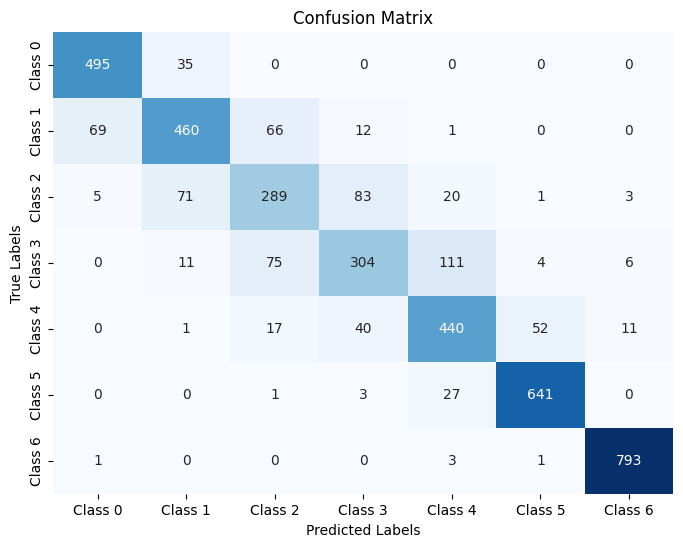

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       530
           1       0.80      0.76      0.78       608
           2       0.65      0.61      0.63       472
           3       0.69      0.59      0.64       511
           4       0.73      0.78      0.76       561
           5       0.92      0.95      0.94       672
           6       0.98      0.99      0.98       798

    accuracy                           0.82      4152
   macro avg       0.80      0.80      0.80      4152
weighted avg       0.82      0.82      0.82      4152



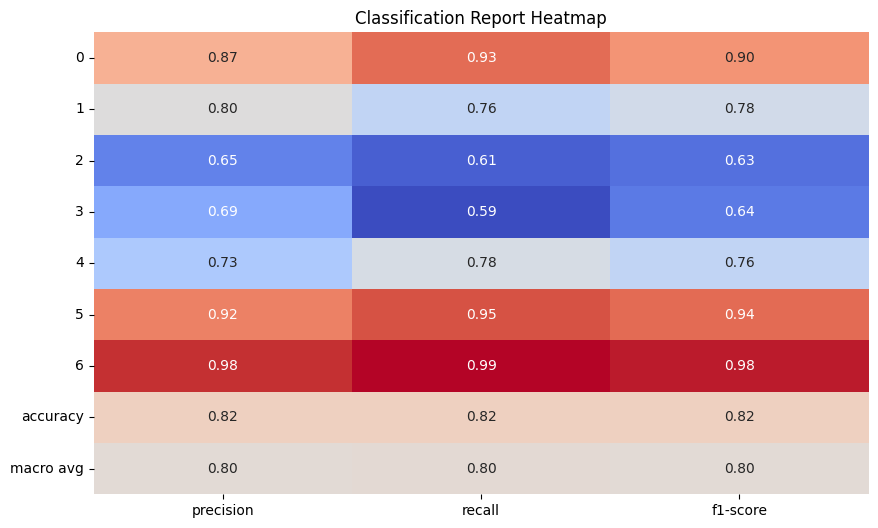

In [33]:
print("Classification Report:\n", classification_report(y_test, y_pred))
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert classification report to DataFrame
report_df = pd.DataFrame(report).transpose()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="coolwarm", fmt='.2f', cbar=False)
plt.title("Classification Report Heatmap")
plt.show()
